<a href="https://colab.research.google.com/github/Ai-VS-Human/ML/blob/main/%EC%9A%B0%EC%A3%BC%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


sns.set()

plt.rcParams['font.family'] = 'Malgun Gothic'  # (Windows 용) 한글 출력을 위한 글꼴 설정
#plt.rcParams['font.family'] = 'AppleGothic'  # (MAC, 리눅스 용)

plt.rcParams['axes.unicode_minus'] = False    # 문자 - (마이너스) 정상 출력을 위한 코드

In [49]:
df_train = pd.read_csv('/content/drive/MyDrive/kaggle/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/kaggle/test.csv')
df_sampe = pd.read_csv('/content/drive/MyDrive/kaggle/sample_submission.csv')

# 결측치 확인 (데이터 종류 확인) 

In [50]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## 데이터 널값 , 타입 탐색

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### 데이터 isna().sum() 누락된 값 nan값 보기

In [54]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### dropna() 로 전체 데이터의 행의값이 4/1 날라간걸 확인

In [55]:
df_train.dropna() # 결국 안덮어씌워서 데이터를 안날리기를택한다 눈으로확인만함

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### fillna(0) 넌값을 숫자 0으로 채운다 
- replace()과 같음 
- 널값 확인 숫자로 바꿔줬으니 타입을 인트로변환가능하다 

In [57]:
df_train = df_train.fillna(0)
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

#  데이터 원핫인코딩
- 데이터의 널값을 우선 확인
- PassengerId, HomePlanet , Cabin, Destination / 범주형 타입 / 원핫인코딩할생각
- CryoSleep, VIP , Transported  / Bool 타입 
- 데이터의 숫자 범위가 크기때문에 정규화 시킬것까지 확인

In [58]:
df_train["VIP"] = df_train["VIP"].astype('int64')
df_train["CryoSleep"] = df_train["CryoSleep"].astype(int)
df_train["Transported"] = df_train["Transported"].astype(int)

## 데이터 타입 , 변경 

In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   int64  
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 950.9+ KB


In [62]:
category_feature_index = df_train.dtypes[df_train.dtypes=='object'].index
print('카테고리형 변수수:', len(category_feature_index))

numeric_feature_index = df_train.dtypes[df_train.dtypes!='object'].index
print('연속형 변수수:', len(numeric_feature_index))

카테고리형 변수수: 5
연속형 변수수: 9


In [63]:
print('카테고리형 변수명')
print(category_feature_index)
print('-------'*10)
print('연속형 변수명')
print(numeric_feature_index)

카테고리형 변수명
Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name'], dtype='object')
----------------------------------------------------------------------
연속형 변수명
Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported'],
      dtype='object')


In [64]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [ ]:
# # .value_counts()를 통해 각 컬럼별로 몇 개의 row가 있는지 셀 수 있습니다
# for col in category_feature_index:
#     print(col + " 카운트::")
#     print(df_train.loc[:, col].value_counts())
#     print()

### 원핫인코딩 겟 더미로 범주형타입 숫자로 변경
- 연산이더잘되게 숫자를 이진으로분류한다 
 - df_out= pd_get.dummies(data , columns=['',''])
 -####df_out.head()

In [67]:
df=pd.get_dummies(data = df_train, columns = ['HomePlanet','Destination'])

In [69]:
df = df.drop(['Name','PassengerId'],axis=1)

In [79]:
df

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_0,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_0,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1
1,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,1,0,0,0,0,0,1
2,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1,0,0,0,0,1
3,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,0,0,0,0,1
4,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0,1,0,0,1,0,0
8689,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0
8690,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0,1,0,0,0,0,0,1
8691,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,0,1,0,0,1,0,0


In [ ]:
df_train['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [ ]:
df_train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [ ]:
df_train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
df_train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [ ]:
df_train['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [ ]:
df_train['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [71]:
# def is_outliers(s):
#     lower_limit = s.mean() - s.std()*3
#     upper_limit = s.mean() + s.std()*3
#     return ~s.between(lower_limit, upper_limit)

In [76]:
# df_out = df[~df.groupby('VIP')['CryoSleep'].apply(is_outliers)]

# print('이상치 제거전 :' , df.shape)
# print('이상치 제거후 :' , df_out.shape)

이상치 제거전 : (8693, 18)
이상치 제거후 : (8693, 18)


# (사용안함) EDA 시각화 추후에 이용할것들

In [ ]:
len(numeric_feature_index)

6

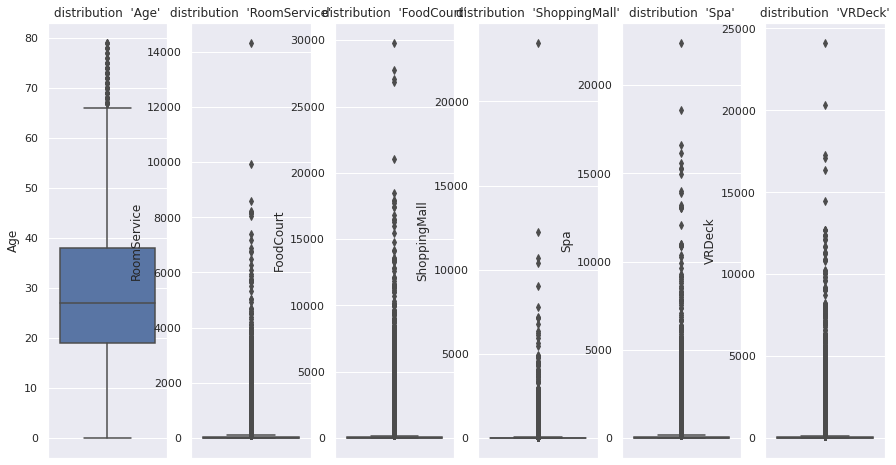

In [ ]:
figure, ax_list = plt.subplots(nrows=1, ncols=6)
figure.set_size_inches(15,8)

for i in range(6):
    col = numeric_feature_index[i]
    sns.boxplot(data=df_train, y=col, showfliers=True, ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{col}'")

In [ ]:
len(numeric_feature_index)

6

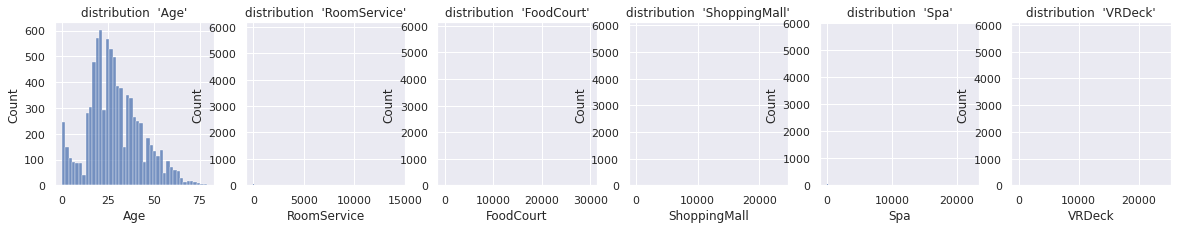

In [ ]:
figure, ax_list = plt.subplots(nrows=1, ncols=6)
figure.set_size_inches(15,3)

for i in range(6):
    sns.histplot(data=df_train.loc[:, numeric_feature_index[i]], ax=ax_list[i])
    ax_list[i].set_title(f"distribution  '{numeric_feature_index[i]}'")

In [ ]:
def plotbar(data , feature):
    fig = plt.figure(figsize=(15,20))
    sns.barplot(x = feature , y = 'Transported' , data = data , palette = 'Set3' , orient = 'v' )

In [ ]:
def plotbox(data , feature):
    fig = plt.figure(figsize=(12,6))
    sns.boxplot(x = feature , y = 'Transported' , data = data , palette = 'Set3' , orient = 'v' )





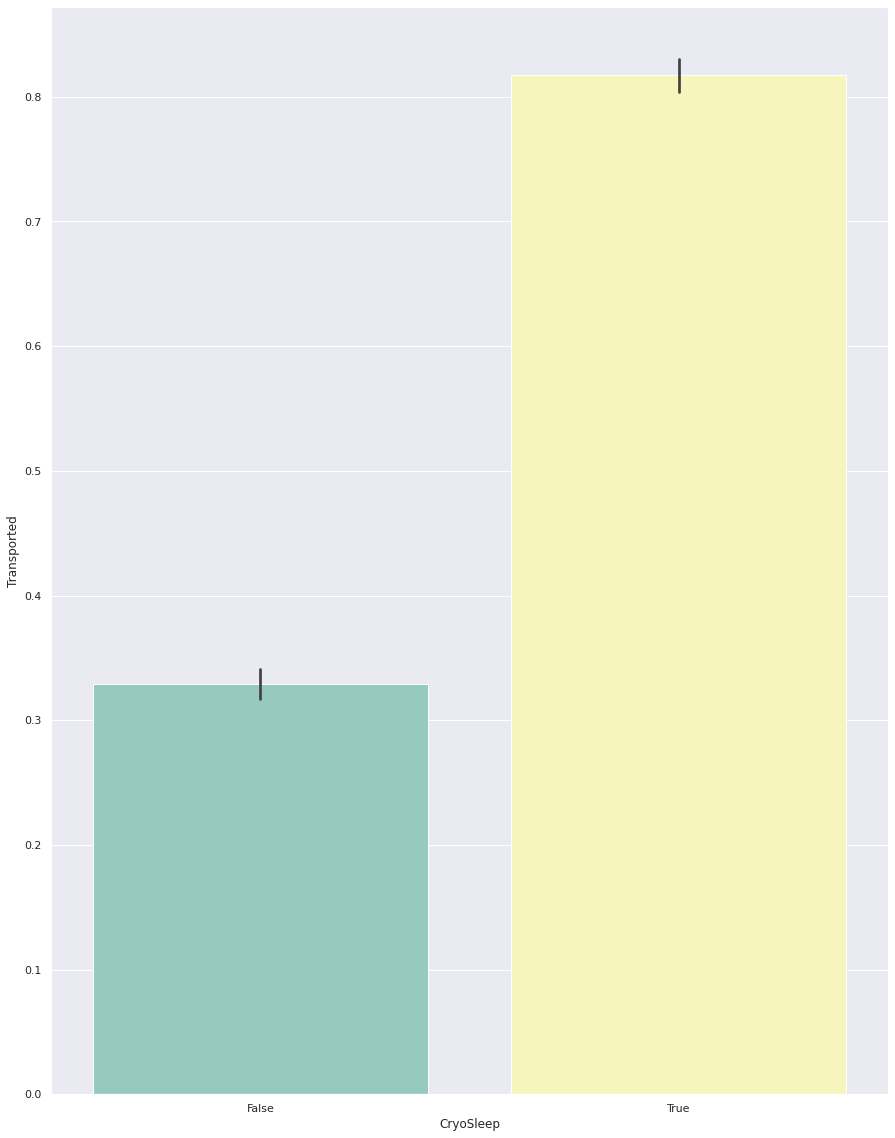

In [ ]:
plotbar(df_train , 'CryoSleep')

In [ ]:
len(category_feature_index)

8

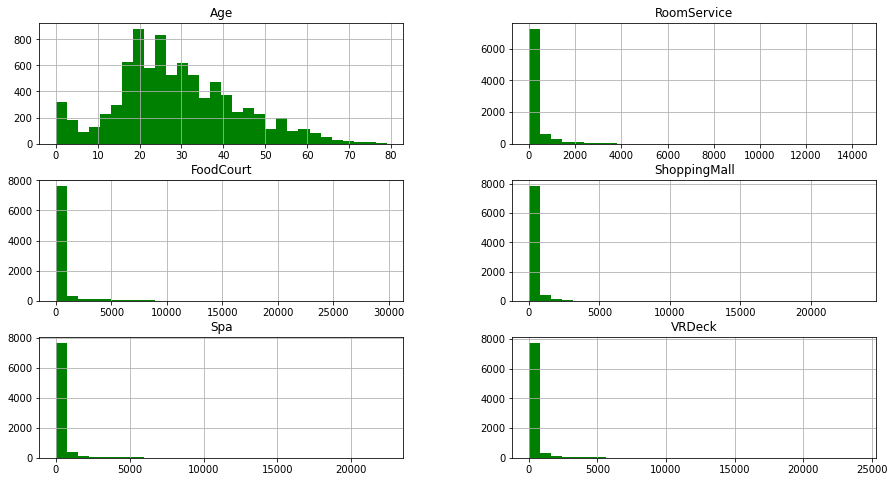

In [ ]:
df_train.hist(bins=30,figsize=(15,8),color='g');


# EDA 탐색적 상관관계

Text(0.5, 1.0, 'Feature Correlation')

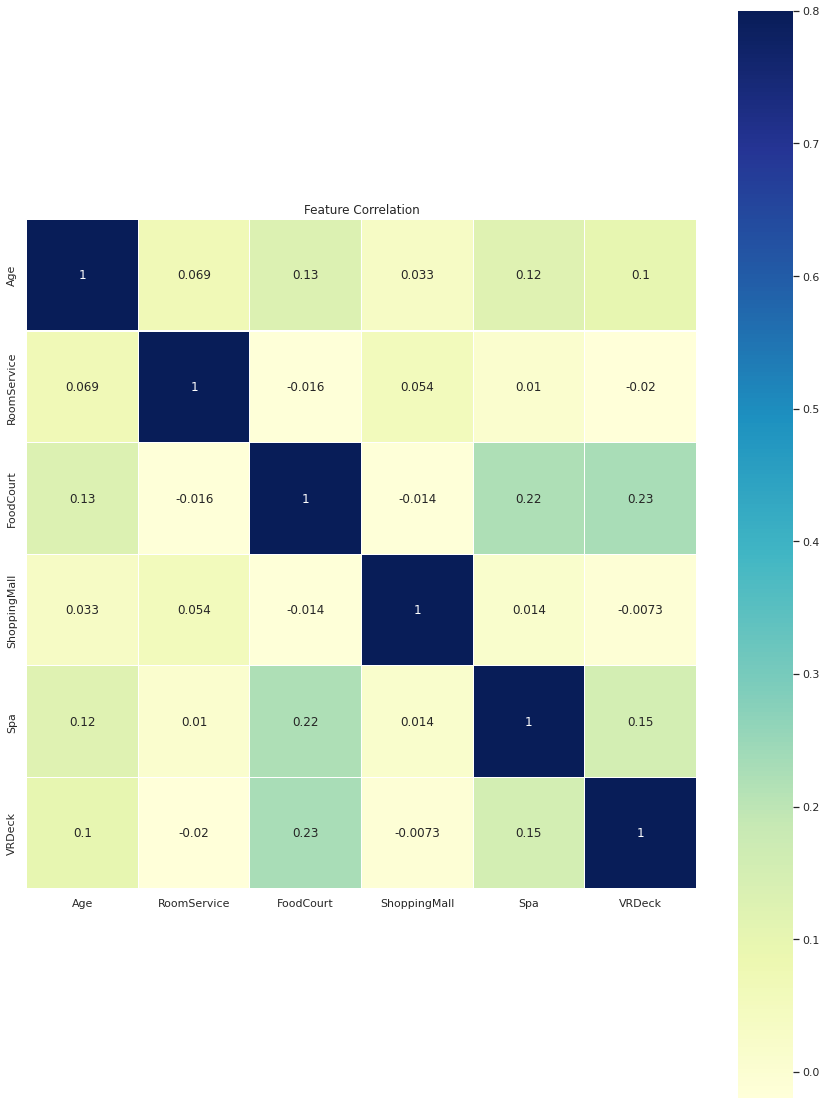

In [ ]:
corr = df_train.corr()
plt.figure(figsize =(15,20));
sns.heatmap(corr, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu');
plt.title('Feature Correlation')


# 시각화는 엄청난 로우의 갯수를 연산하기 때문에 느리다 는것을알수있따 

In [ ]:

figure, ax_list_list = plt.subplots(nrows=1, ncols=8);
figure.set_size_inches(20,10)

ax_list = ax_list_list.reshape(8)  # 다차원 행렬의 차원을 원하는 모양으로 변경합니다.
print(ax_list_list.shape)
print(ax_list.shape)

for i in range(len(category_feature_index)):
    col = category_feature_index[i]
    sns.countplot(data=df_train, x=col, ax=ax_list[i] , hue ='Transported')
    ax_list[i].set_title(col)

plt.tight_layout()

(8,)
(8,)
Error in callback <function flush_figures at 0x7f5ed5d7e4c0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
sns.countplot(data=df_train, x='Cabin', hue='Transported')

Error in callback <function flush_figures at 0x7f5ed5d7e4c0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
sns.countplot(data=df_train, x='CryoSleep', hue='PassengerId')

KeyboardInterrupt: ignored

In [81]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,8683,8684,8685,8686,8687,8688,8689,8690,8691,8692
CryoSleep,0,0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
Cabin,B/0/P,F/0/S,A/0/S,A/0/S,F/1/S,F/0/P,F/2/S,G/0/S,F/3/S,B/1/P,...,F/1894/P,G/1508/P,A/97/P,A/97/P,A/97/P,A/98/P,G/1499/S,G/1500/S,E/608/S,E/608/S
Age,39.0,24.0,58.0,33.0,16.0,44.0,26.0,28.0,35.0,14.0,...,21.0,23.0,0.0,32.0,30.0,41.0,18.0,26.0,32.0,44.0
VIP,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
RoomService,0.0,109.0,43.0,0.0,303.0,0.0,42.0,0.0,0.0,0.0,...,86.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,126.0
FoodCourt,0.0,9.0,3576.0,1283.0,70.0,483.0,1539.0,0.0,785.0,0.0,...,3.0,0.0,0.0,1146.0,3208.0,6819.0,0.0,0.0,1049.0,4688.0
ShoppingMall,0.0,25.0,0.0,371.0,151.0,0.0,3.0,0.0,17.0,0.0,...,149.0,0.0,0.0,0.0,0.0,0.0,0.0,1872.0,0.0,0.0
Spa,0.0,549.0,6715.0,3329.0,565.0,291.0,0.0,0.0,216.0,0.0,...,208.0,0.0,0.0,50.0,2.0,1643.0,0.0,1.0,353.0,0.0
VRDeck,0.0,44.0,49.0,193.0,2.0,0.0,0.0,0.0,0.0,0.0,...,329.0,0.0,0.0,34.0,330.0,74.0,0.0,0.0,3235.0,12.0
Transported,0,1,0,0,1,1,1,1,1,1,...,0,1,1,0,1,0,0,1,0,1


In [ ]:
#